YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


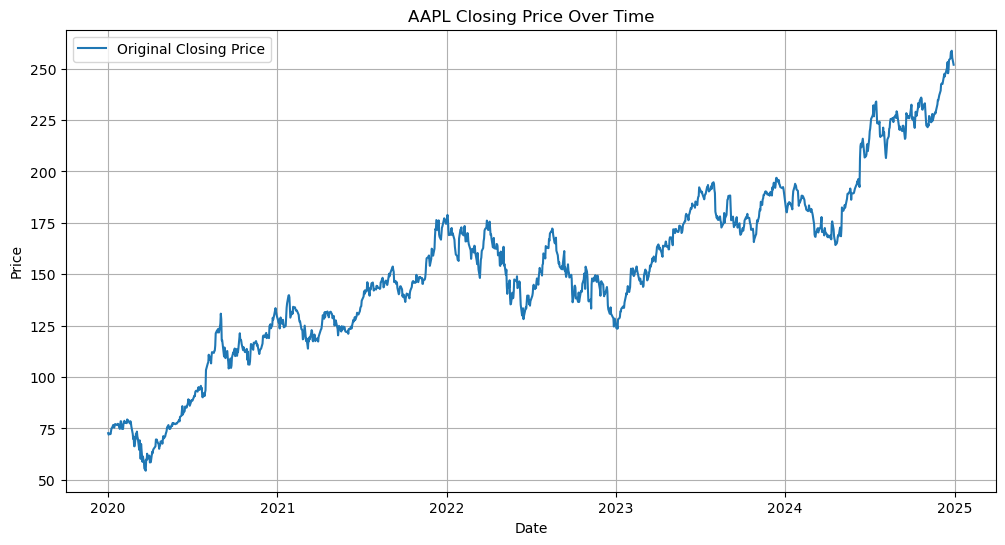

🔎 Model Evaluation:
Mean Squared Error: 732.64
R² Score: -5.6950


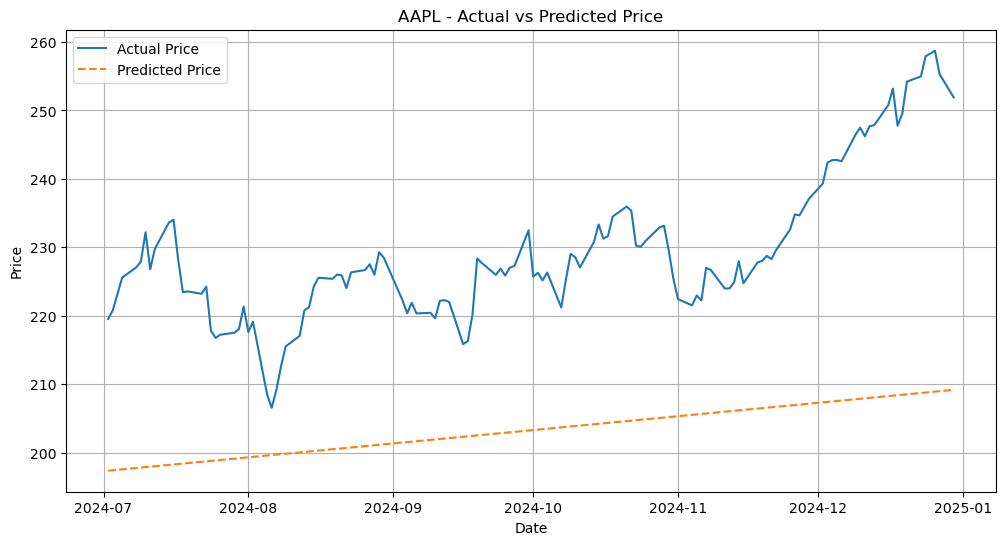

In [ ]:
# ========================================
# 📦 Install Required Packages (Run once)
# ========================================
!pip install yfinance scikit-learn matplotlib pandas --quiet

# ========================================
# 📥 Import Libraries
# ========================================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

%matplotlib inline

# ========================================
# 📈 Step 1: Download Stock Price Data
# ========================================
ticker = 'AAPL'  # Change to 'TSLA', 'GOOG', etc.
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
df = df[['Close']].dropna()

# Reset index to get 'Date' as column
df = df.reset_index()

# ========================================
# 🧠 Step 2: Feature Engineering
# ========================================
# Create numeric time variable for regression
df['Date_Ordinal'] = pd.to_datetime(df['Date']).map(pd.Timestamp.toordinal)

# Visualize original data
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Original Closing Price')
plt.title(f"{ticker} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# ========================================
# 🔍 Step 3: Train-Test Split
# ========================================
# Use 90% for training and 10% for testing
split = int(len(df) * 0.9)
train = df.iloc[:split]
test = df.iloc[split:]

X_train = train[['Date_Ordinal']]
y_train = train['Close']
X_test = test[['Date_Ordinal']]
y_test = test['Close']

# ========================================
# 🔧 Step 4: Linear Regression Model
# ========================================
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("🔎 Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test['Date'], y_test, label='Actual Price')
plt.plot(test['Date'], y_pred, label='Predicted Price', linestyle='--')
plt.title(f"{ticker} - Actual vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# ========================================
# 📅 Step 5: Forecasting Future Dates
# ========================================
# Forecast for next 30 days
future_days = 30
last_date = df['Date'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days+1)]
future_ordinals = [pd.Timestamp(date).toordinal() for date in future_dates]

# Predict future values
future_pred = model.predict(np.array(future_ordinals).reshape(-1, 1))

# Create DataFrame for plotting
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_pred
})

# Plot future prediction
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Historical Price')
plt.plot(future_df['Date'], future_df['Predicted_Close'], label='Forecasted Price', linestyle='--', color='green')
plt.title(f"{ticker} - Forecast for Next {future_days} Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
